# Neighbourhood Component Feature Selection Algorithm Application on SRBCT Dataset

In [86]:
# SRBCT : small-round-blue-cell tumor
# In this datast, 2308 genes are measured for each of the 88 samples.
# These belong to the four cancer type
# There are 25 blinded (unlabeled) test samples. 
# 63 samples are used for training
# Dataset Description: https://research.nhgri.nih.gov/microarray/Supplement/Images/supplemental_methods.pdf
# Dataset Download: https://research.nhgri.nih.gov/microarray/Supplement/ 

In [87]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Importing NCFS module 
import import_ipynb
import NCFS

# Creating dataframe of SRBCT Dataset

file_path = os.path.abspath('supplemental_data.txt')
file_path
data = pd.read_csv(file_path,sep="\t")


# Data Preprocessing and Exploration

In [88]:
# First 5 entries of dataframe
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,Image Id.,Gene Description,EWS-T1,EWS-T2,EWS-T3,EWS-T4,EWS-T6,EWS-T7,EWS-T9,EWS-T11,...,TEST-20,TEST-17,TEST-18,TEST-22,TEST-16,TEST-23,TEST-14,TEST-25,TEST-15,TEST-19
1,21652,"catenin (cadherin-associated protein), alpha 1...",3.2025,1.6547,3.2779,1.006,2.7098,2.0588,1.8483,2.714,...,3.0381,3.7487,0.186,0.7623,0.8264,0.6403,0.6729,0.8249,0.1181,0.7173
2,25725,farnesyl-diphosphate farnesyltransferase 1,0.0681,0.071,0.116,0.1906,0.2367,0.0823,0.1234,0.1805,...,0.1378,1.6411,0.0872,0.3245,0.2202,0.2515,0.3038,0.3454,0.1068,0.1108
3,26184,"phosphofructokinase, platelet",1.046,1.0409,0.8926,0.4302,0.3693,0.9021,0.9983,0.4964,...,1.2505,1.0424,1.9834,0.2148,2.2806,1.3489,2.0071,1.2253,0.3881,0.6291
4,22260,cytochrome c-1,0.1243,0.052,0.1014,0.1035,0.219,0.1288,0.2203,0.2509,...,0.2309,0.214,0.1222,0.0707,0.0915,0.0646,0.1553,0.1277,0.0622,0.0742


In [89]:
# Rows and columns of dataset
data.shape

(2309, 90)

In [90]:
# Transposing Dataframe to have samples as rows 
data = data.T

In [91]:
# First 5 entries of transposed dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 0,Image Id.,21652,25725,26184,22260,22293,22493,23019,23132,24145,...,809513,504207,810448,810402,782503,795277,809383,809815,810483,503033
Unnamed: 1,Gene Description,"catenin (cadherin-associated protein), alpha 1...",farnesyl-diphosphate farnesyltransferase 1,"phosphofructokinase, platelet",cytochrome c-1,uroporphyrinogen III synthase (congenital eryt...,ribosomal protein L26,guanine nucleotide binding protein (G protein)...,pre-mRNA splicing factor SF3a (120 kDa subunit...,adenylyl cyclase-associated protein,...,thymus specific serine peptidase,putative c-Myc-responsive,ESTs,"ESTs, Weakly similar to veli 1 [H.sapiens]",Homo sapiens clone 23716 mRNA sequence,ESTs,"ESTs, Weakly similar to angiopoietin Y1 [H.sap...",CD39-like 2,DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 16,ESTs
Unnamed: 2,EWS-T1,3.2025,0.0681,1.046,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.724,0.2044
Unnamed: 3,EWS-T2,1.6547,0.071,1.0409,0.052,0.2045,2.1609,2.4452,1.1473,0.7371,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.414,1.2708,0.299
Unnamed: 4,EWS-T3,3.2779,0.116,0.8926,0.1014,0.2818,1.9773,3.259,1.4106,0.9548,...,1.2674,1.5152,0.2382,0.872,0.6819,0.3221,0.2156,0.3227,1.2142,0.223


In [92]:
# removing first row
data.drop('Unnamed: 0',axis=0,inplace=True)

In [93]:
# dataset after removing first row
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 1,Gene Description,"catenin (cadherin-associated protein), alpha 1...",farnesyl-diphosphate farnesyltransferase 1,"phosphofructokinase, platelet",cytochrome c-1,uroporphyrinogen III synthase (congenital eryt...,ribosomal protein L26,guanine nucleotide binding protein (G protein)...,pre-mRNA splicing factor SF3a (120 kDa subunit...,adenylyl cyclase-associated protein,...,thymus specific serine peptidase,putative c-Myc-responsive,ESTs,"ESTs, Weakly similar to veli 1 [H.sapiens]",Homo sapiens clone 23716 mRNA sequence,ESTs,"ESTs, Weakly similar to angiopoietin Y1 [H.sap...",CD39-like 2,DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 16,ESTs
Unnamed: 2,EWS-T1,3.2025,0.0681,1.046,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.724,0.2044
Unnamed: 3,EWS-T2,1.6547,0.071,1.0409,0.052,0.2045,2.1609,2.4452,1.1473,0.7371,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.414,1.2708,0.299
Unnamed: 4,EWS-T3,3.2779,0.116,0.8926,0.1014,0.2818,1.9773,3.259,1.4106,0.9548,...,1.2674,1.5152,0.2382,0.872,0.6819,0.3221,0.2156,0.3227,1.2142,0.223
Unnamed: 5,EWS-T4,1.006,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871


In [94]:
# storing features (genes) names in an array so that later we can make it column header
column_names = np.array(data[:'Unnamed: 1'])

In [95]:
# checking rows and columns in column_names
column_names.shape

(1, 2309)

In [96]:
# making it 1-D
column_names=column_names.ravel()

In [97]:
column_names

array(['Gene Description',
       'catenin (cadherin-associated protein), alpha 1 (102kD)',
       'farnesyl-diphosphate farnesyltransferase 1', ..., 'CD39-like 2',
       'DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 16', 'ESTs'],
      dtype=object)

In [98]:
# Now removing this column from dataset
data.drop(['Unnamed: 1'],axis=0,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 2,EWS-T1,3.2025,0.0681,1.046,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.724,0.2044
Unnamed: 3,EWS-T2,1.6547,0.071,1.0409,0.052,0.2045,2.1609,2.4452,1.1473,0.7371,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.414,1.2708,0.299
Unnamed: 4,EWS-T3,3.2779,0.116,0.8926,0.1014,0.2818,1.9773,3.259,1.4106,0.9548,...,1.2674,1.5152,0.2382,0.872,0.6819,0.3221,0.2156,0.3227,1.2142,0.223
Unnamed: 5,EWS-T4,1.006,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
Unnamed: 6,EWS-T6,2.7098,0.2367,0.3693,0.219,0.3711,1.78,3.2376,0.6769,0.8546,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [99]:
# unique values (labels) in gene description (labels) column
data[data.columns[0]].unique()

array(['EWS-T1', 'EWS-T2', 'EWS-T3', 'EWS-T4', 'EWS-T6', 'EWS-T7',
       'EWS-T9', 'EWS-T11', 'EWS-T12', 'EWS-T13', 'EWS-T14', 'EWS-T15',
       'EWS-T19', 'EWS-C8', 'EWS-C3', 'EWS-C2', 'EWS-C4', 'EWS-C6',
       'EWS-C9', 'EWS-C7', 'EWS-C1', 'EWS-C11', 'EWS-C10', 'BL-C5',
       'BL-C6', 'BL-C7', 'BL-C8', 'BL-C1', 'BL-C2', 'BL-C3', 'BL-C4',
       'NB-C1', 'NB-C2', 'NB-C3', 'NB-C6', 'NB-C12', 'NB-C7', 'NB-C4',
       'NB-C5', 'NB-C10', 'NB-C11', 'NB-C9', 'NB-C8', 'RMS-C4', 'RMS-C3',
       'RMS-C9', 'RMS-C2', 'RMS-C5', 'RMS-C6', 'RMS-C7', 'RMS-C8',
       'RMS-C10', 'RMS-C11', 'RMS-T1', 'RMS-T4', 'RMS-T2', 'RMS-T6',
       'RMS-T7', 'RMS-T8', 'RMS-T5', 'RMS-T3', 'RMS-T10', 'RMS-T11',
       'TEST-9', 'TEST-11', 'TEST-5', 'TEST-8', 'TEST-10', 'TEST-13',
       'TEST-3', 'TEST-1', 'TEST-2', 'TEST-4', 'TEST-7', 'TEST-12',
       'TEST-24', 'TEST-6', 'TEST-21', 'TEST-20', 'TEST-17', 'TEST-18',
       'TEST-22', 'TEST-16', 'TEST-23', 'TEST-14', 'TEST-25', 'TEST-15',
       'TEST-19'], dty

In [100]:
# Changing to 4 Labels
for n,i in enumerate(data[data.columns[0]]):
    if i.split('-')[0]=='EWS':
        i = i.replace(i,'EWS')
    elif i.split('-')[0]=='NB':
        i = i.replace(i,'NB')
    elif i.split('-')[0]=='BL':
        i = i.replace(i,'BL')
    elif i.split('-')[0]=='RMS':
        i = i.replace(i,'RMS')
    data[data.columns[0]][n]=i
    
print(data[data.columns[0]])

Unnamed: 2         EWS
Unnamed: 3         EWS
Unnamed: 4         EWS
Unnamed: 5         EWS
Unnamed: 6         EWS
Unnamed: 7         EWS
Unnamed: 8         EWS
Unnamed: 9         EWS
Unnamed: 10        EWS
Unnamed: 11        EWS
Unnamed: 12        EWS
Unnamed: 13        EWS
Unnamed: 14        EWS
Unnamed: 15        EWS
Unnamed: 16        EWS
Unnamed: 17        EWS
Unnamed: 18        EWS
Unnamed: 19        EWS
Unnamed: 20        EWS
Unnamed: 21        EWS
Unnamed: 22        EWS
Unnamed: 23        EWS
Unnamed: 24        EWS
Unnamed: 25         BL
Unnamed: 26         BL
Unnamed: 27         BL
Unnamed: 28         BL
Unnamed: 29         BL
Unnamed: 30         BL
Unnamed: 31         BL
                ...   
Unnamed: 60        RMS
Unnamed: 61        RMS
Unnamed: 62        RMS
Unnamed: 63        RMS
Unnamed: 64        RMS
Unnamed: 65     TEST-9
Unnamed: 66    TEST-11
Unnamed: 67     TEST-5
Unnamed: 68     TEST-8
Unnamed: 69    TEST-10
Unnamed: 70    TEST-13
Unnamed: 71     TEST-3
Unnamed: 72

In [101]:
data[data.columns[0]].unique()

array(['EWS', 'BL', 'NB', 'RMS', 'TEST-9', 'TEST-11', 'TEST-5', 'TEST-8',
       'TEST-10', 'TEST-13', 'TEST-3', 'TEST-1', 'TEST-2', 'TEST-4',
       'TEST-7', 'TEST-12', 'TEST-24', 'TEST-6', 'TEST-21', 'TEST-20',
       'TEST-17', 'TEST-18', 'TEST-22', 'TEST-16', 'TEST-23', 'TEST-14',
       'TEST-25', 'TEST-15', 'TEST-19'], dtype=object)

In [102]:
# Creating a test dataset which contains rows of only blinded data
# Removing all rows except labelled TEST-xx

test_data = data.drop(data.index[np.where(data[data.columns[0]].str.split('-').str[0]!='TEST')[0]],axis=0) 

In [103]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 65,TEST-9,1.7733,0.4875,0.5832,0.3514,0.7182,4.7686,8.8864,2.2408,0.8908,...,1.7174,0.7078,0.1307,0.2834,0.1558,0.2899,0.2239,0.3658,0.6412,0.2182
Unnamed: 66,TEST-11,0.1397,0.0846,2.3266,0.1188,0.3497,2.6046,3.9808,1.8516,1.3238,...,0.7283,1.3666,0.2613,1.1244,0.2988,0.2298,0.1414,0.1283,0.7414,0.7103
Unnamed: 67,TEST-5,1.942,0.2103,2.4897,0.177,0.5963,2.9903,4.2457,2.4517,1.6298,...,0.2924,0.4544,0.5507,0.225,0.2284,0.6212,0.1504,1.9152,0.9166,0.185
Unnamed: 68,TEST-8,0.7721,0.1855,1.1922,0.0979,0.1841,0.9914,9.9955,1.5774,0.71,...,0.1288,0.2941,0.3197,0.3858,1.3418,0.2996,0.2328,0.5194,0.9413,0.3751
Unnamed: 69,TEST-10,0.3296,0.351,0.4258,0.0737,0.1702,0.2839,4.1636,0.4754,1.8462,...,0.3817,0.3617,0.371,0.5255,0.0979,0.238,0.6157,1.615,0.3655,0.4591
Unnamed: 70,TEST-13,0.7509,0.4165,1.2165,0.128,0.2474,0.3816,6.8751,1.2534,0.7674,...,0.62,0.2454,0.2307,0.2375,0.1286,0.3392,0.2993,0.3876,0.8141,0.2449
Unnamed: 71,TEST-3,1.4407,0.3036,2.919,1.1618,0.1502,0.2694,5.3357,0.3843,1.8788,...,0.1755,0.6217,0.0673,0.8625,0.4332,0.0564,0.214,1.7708,0.0362,0.0985
Unnamed: 72,TEST-1,1.1497,0.3107,1.7594,0.0345,0.2663,0.5003,10.2512,2.5186,1.1187,...,0.8346,0.3896,0.298,0.555,0.932,0.0618,0.0584,0.3132,0.7096,0.946
Unnamed: 73,TEST-2,3.2036,0.1329,3.0148,0.1147,0.2369,0.6457,14.319,3.4008,1.2343,...,0.4919,0.2159,0.092,0.6773,1.5262,0.0598,0.0887,0.1786,0.182,0.1827
Unnamed: 74,TEST-4,2.3189,1.2901,0.8116,0.1167,0.2203,0.2826,19.0419,1.0918,1.6208,...,0.9343,0.1566,0.2141,0.1697,0.1526,0.1038,0.0902,0.8383,0.8792,0.3692


In [104]:
# Now removing label column from test dataset, containing only features
test_data = test_data.drop(test_data.columns[0],axis=1)
test_data

,1,2,3,4,5,6,7,8,9,10,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 65,1.7733,0.4875,0.5832,0.3514,0.7182,4.7686,8.8864,2.2408,0.8908,3.5985,...,1.7174,0.7078,0.1307,0.2834,0.1558,0.2899,0.2239,0.3658,0.6412,0.2182
Unnamed: 66,0.1397,0.0846,2.3266,0.1188,0.3497,2.6046,3.9808,1.8516,1.3238,1.9454,...,0.7283,1.3666,0.2613,1.1244,0.2988,0.2298,0.1414,0.1283,0.7414,0.7103
Unnamed: 67,1.942,0.2103,2.4897,0.177,0.5963,2.9903,4.2457,2.4517,1.6298,2.2302,...,0.2924,0.4544,0.5507,0.225,0.2284,0.6212,0.1504,1.9152,0.9166,0.185
Unnamed: 68,0.7721,0.1855,1.1922,0.0979,0.1841,0.9914,9.9955,1.5774,0.71,2.0473,...,0.1288,0.2941,0.3197,0.3858,1.3418,0.2996,0.2328,0.5194,0.9413,0.3751
Unnamed: 69,0.3296,0.351,0.4258,0.0737,0.1702,0.2839,4.1636,0.4754,1.8462,0.5868,...,0.3817,0.3617,0.371,0.5255,0.0979,0.238,0.6157,1.615,0.3655,0.4591
Unnamed: 70,0.7509,0.4165,1.2165,0.128,0.2474,0.3816,6.8751,1.2534,0.7674,6.2661,...,0.62,0.2454,0.2307,0.2375,0.1286,0.3392,0.2993,0.3876,0.8141,0.2449
Unnamed: 71,1.4407,0.3036,2.919,1.1618,0.1502,0.2694,5.3357,0.3843,1.8788,0.396,...,0.1755,0.6217,0.0673,0.8625,0.4332,0.0564,0.214,1.7708,0.0362,0.0985
Unnamed: 72,1.1497,0.3107,1.7594,0.0345,0.2663,0.5003,10.2512,2.5186,1.1187,1.6649,...,0.8346,0.3896,0.298,0.555,0.932,0.0618,0.0584,0.3132,0.7096,0.946
Unnamed: 73,3.2036,0.1329,3.0148,0.1147,0.2369,0.6457,14.319,3.4008,1.2343,2.845,...,0.4919,0.2159,0.092,0.6773,1.5262,0.0598,0.0887,0.1786,0.182,0.1827
Unnamed: 74,2.3189,1.2901,0.8116,0.1167,0.2203,0.2826,19.0419,1.0918,1.6208,2.8951,...,0.9343,0.1566,0.2141,0.1697,0.1526,0.1038,0.0902,0.8383,0.8792,0.3692


In [105]:
# Normalizing features of test dataset (0-1)
scaler = preprocessing.MinMaxScaler()
scaler.fit(test_data)
test_data = scaler.transform(test_data)

In [106]:
# Labels for blinded data (source: https://research.nhgri.nih.gov/microarray/Supplement/Images/supplemental_methods.pdf)

test_labels = np.array([2,1,3,3,2,1,0,2,3,3,1,1,3,2,0,2,3,0,1,1,1,3,2,3,2])
test_labels

array([2, 1, 3, 3, 2, 1, 0, 2, 3, 3, 1, 1, 3, 2, 0, 2, 3, 0, 1, 1, 1, 3,
       2, 3, 2])

In [107]:
# removing rows with label 'TEST' from training dataset
    
data = data.drop(data.index[np.where(data[data.columns[0]].str.split('-').str[0]=='TEST')[0]],axis=0)


In [108]:
# rows and columns of training dataset
data.shape

(63, 2309)

In [109]:
# Total count of each label present in dataset
data[data.columns[0]].value_counts()

EWS    23
RMS    20
NB     12
BL      8
Name: 0, dtype: int64

In [110]:
# training dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 2,EWS,3.2025,0.0681,1.046,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.724,0.2044
Unnamed: 3,EWS,1.6547,0.071,1.0409,0.052,0.2045,2.1609,2.4452,1.1473,0.7371,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.414,1.2708,0.299
Unnamed: 4,EWS,3.2779,0.116,0.8926,0.1014,0.2818,1.9773,3.259,1.4106,0.9548,...,1.2674,1.5152,0.2382,0.872,0.6819,0.3221,0.2156,0.3227,1.2142,0.223
Unnamed: 5,EWS,1.006,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
Unnamed: 6,EWS,2.7098,0.2367,0.3693,0.219,0.3711,1.78,3.2376,0.6769,0.8546,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [111]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308
Unnamed: 60,RMS,2.2313,1.9247,0.2943,0.1762,0.3855,5.3998,7.1398,1.2459,1.3112,...,1.3447,0.4759,0.1446,0.6068,0.2573,0.2658,0.2081,0.403,0.8022,0.2221
Unnamed: 61,RMS,1.8594,0.524,0.6808,0.3013,0.4011,3.5232,7.283,0.9024,1.9208,...,0.8641,0.2971,0.4911,0.3096,0.4337,0.3058,0.3701,0.9735,0.5892,0.381
Unnamed: 62,RMS,1.2705,0.4657,0.9344,0.068,0.393,3.2629,4.8109,1.5265,1.5754,...,0.8563,0.8031,0.2856,1.4519,0.1235,0.1575,0.0756,0.1946,1.0466,0.1925
Unnamed: 63,RMS,1.2766,0.777,0.2212,0.1432,0.1669,0.4744,9.4915,1.7763,1.1851,...,0.4169,0.3641,0.4261,0.5174,0.4538,0.1139,0.214,0.3962,0.9818,0.4603
Unnamed: 64,RMS,2.0298,0.7067,1.0439,0.1016,0.2147,0.3269,17.533,2.2418,1.7367,...,0.7904,0.1079,0.3122,0.2775,0.2211,0.1197,0.1099,0.307,0.2622,0.3379


In [112]:
# adding column header to dataset
data = pd.DataFrame(data = data.values, columns = column_names)

In [113]:
data.shape

(63, 2309)

In [114]:
data.head()

,Gene Description,"catenin (cadherin-associated protein), alpha 1 (102kD)",farnesyl-diphosphate farnesyltransferase 1,"phosphofructokinase, platelet",cytochrome c-1,uroporphyrinogen III synthase (congenital erythropoietic porphyria),ribosomal protein L26,"guanine nucleotide binding protein (G protein), alpha stimulating activity polypeptide 1","pre-mRNA splicing factor SF3a (120 kDa subunit), similar to S. cerevisiae PRP21",adenylyl cyclase-associated protein,...,thymus specific serine peptidase,putative c-Myc-responsive,ESTs,"ESTs, Weakly similar to veli 1 [H.sapiens]",Homo sapiens clone 23716 mRNA sequence,ESTs,"ESTs, Weakly similar to angiopoietin Y1 [H.sapiens]",CD39-like 2,DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 16,ESTs
0,EWS,3.2025,0.0681,1.046,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.724,0.2044
1,EWS,1.6547,0.071,1.0409,0.052,0.2045,2.1609,2.4452,1.1473,0.7371,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.414,1.2708,0.299
2,EWS,3.2779,0.116,0.8926,0.1014,0.2818,1.9773,3.259,1.4106,0.9548,...,1.2674,1.5152,0.2382,0.872,0.6819,0.3221,0.2156,0.3227,1.2142,0.223
3,EWS,1.006,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
4,EWS,2.7098,0.2367,0.3693,0.219,0.3711,1.78,3.2376,0.6769,0.8546,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [115]:
# datatypes of each column of dataset
data.dtypes

Gene Description                                                                                                                                                                                                                                                   object
catenin (cadherin-associated protein), alpha 1 (102kD)                                                                                                                                                                                                             object
farnesyl-diphosphate farnesyltransferase 1                                                                                                                                                                                                                         object
phosphofructokinase, platelet                                                                                                                                                                             

In [116]:
# removing label column, extracting only features
df_features = data.drop('Gene Description',axis=1)
df_features = pd.DataFrame(df_features)
df_features.shape


(63, 2308)

In [117]:
df_features.head()

,"catenin (cadherin-associated protein), alpha 1 (102kD)",farnesyl-diphosphate farnesyltransferase 1,"phosphofructokinase, platelet",cytochrome c-1,uroporphyrinogen III synthase (congenital erythropoietic porphyria),ribosomal protein L26,"guanine nucleotide binding protein (G protein), alpha stimulating activity polypeptide 1","pre-mRNA splicing factor SF3a (120 kDa subunit), similar to S. cerevisiae PRP21",adenylyl cyclase-associated protein,ubiquinol-cytochrome c reductase core protein II,...,thymus specific serine peptidase,putative c-Myc-responsive,ESTs,"ESTs, Weakly similar to veli 1 [H.sapiens]",Homo sapiens clone 23716 mRNA sequence,ESTs,"ESTs, Weakly similar to angiopoietin Y1 [H.sapiens]",CD39-like 2,DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 16,ESTs
0,3.2025,0.0681,1.046,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,2.9001,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.724,0.2044
1,1.6547,0.071,1.0409,0.052,0.2045,2.1609,2.4452,1.1473,0.7371,1.9989,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.414,1.2708,0.299
2,3.2779,0.116,0.8926,0.1014,0.2818,1.9773,3.259,1.4106,0.9548,2.0775,...,1.2674,1.5152,0.2382,0.872,0.6819,0.3221,0.2156,0.3227,1.2142,0.223
3,1.006,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,1.661,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
4,2.7098,0.2367,0.3693,0.219,0.3711,1.78,3.2376,0.6769,0.8546,0.6808,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [118]:
# creating dataframe for labels column only
df_labels=data[data.columns[0]]
df_labels = pd.DataFrame(df_labels)
df_labels.head()

,Gene Description
0,EWS
1,EWS
2,EWS
3,EWS
4,EWS


In [119]:
df_labels.shape

(63, 1)

In [120]:
# categories in labels
df_labels['Gene Description'].unique()

array(['EWS', 'BL', 'NB', 'RMS'], dtype=object)

In [126]:
# Label Encoding
le = preprocessing.LabelEncoder()
le.fit(df_labels)
le.classes_
df_labels = pd.DataFrame(data=le.transform(df_labels),columns=['Gene Description']) 
df_labels['Gene Description'].unique()

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 2, 3], dtype=int64)

In [122]:
# Normalizing features of training set (0-1)
scaler = preprocessing.MinMaxScaler()
scaler.fit(df_features)
df_features = scaler.transform(df_features)

In [123]:
df_features

array([[0.88332112, 0.00997174, 0.29288703, ..., 0.18071099, 0.38570505,
        0.16021656],
       [0.44709994, 0.01151816, 0.2912068 , ..., 0.24423963, 0.70710633,
        0.25506316],
       [0.90457133, 0.03551432, 0.24234837, ..., 0.1841343 , 0.67383765,
        0.17886505],
       ...,
       [0.33881968, 0.22199115, 0.25611966, ..., 0.0998025 , 0.57532475,
        0.14828554],
       [0.34053886, 0.38799125, 0.02115112, ..., 0.2325214 , 0.53723623,
        0.41678364],
       [0.55281551, 0.35050392, 0.29219517, ..., 0.17379855, 0.11426556,
        0.29406457]])

# Feature Selection using NCFS

In [128]:
# Feature selection using NCFS
feature_select = NCFS.NCFS(eta=0.001)
feature_select.fit(df_features, df_labels.values)
print(feature_select)

NCFS(alpha=0.1, eta=0.001, kernel='exponential', metric='cityblock', reg=1,
     sigma=1, solver='ncfs')


In [129]:
# Weights associated with each Feature after NCFS
print(feature_select.coef_)

[1.57730251e-04 4.45735204e-06 9.63365220e-08 ... 2.94674150e-11
 1.87494995e-12 2.08186887e-11]


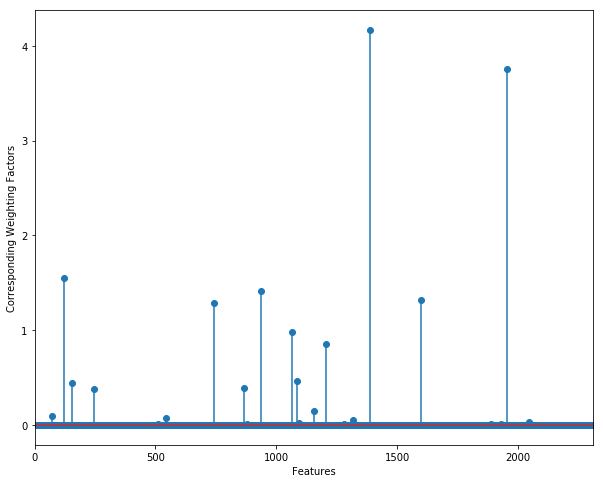

In [130]:
# Features vs. Corresponding Weights plot
plt.figure(figsize=(10,8))
plt.xlim(0,df_features.shape[1]+1)  # set up the plot limits
plt.stem(np.arange(1,df_features.shape[1]+1),np.power(feature_select.coef_,2))
plt.xlabel('Features')
plt.ylabel('Corresponding Weighting Factors')
plt.show()

In [131]:
# 2308 weights in Ascending order 
w_sorted = np.sort(feature_select.coef_)
# 2308 weights in Descending order
w_sorted = w_sorted[::-1]  # reverse w_sorted (first element of array becomes last)
w_sorted

array([2.04188753e+00, 1.93884396e+00, 1.24357160e+00, ...,
       2.59367784e-14, 1.95938132e-14, 1.13146042e-14])

In [132]:
# Features Indices as per ascending weights
w_sortedindex = np.argsort(feature_select.coef_) # sort in ascending order
# Features Indices as per descending weights
w_sortedindex = w_sortedindex[::-1] # reverse w_sortedindex (first element of array becomes last) [descending order]
w_sortedindex

array([1388, 1954,  122, ...,  381,  808,  927], dtype=int64)

In [133]:
w_sortedindex[0:20]

array([1388, 1954,  122,  936, 1600,  741, 1065, 1206, 1083,  152,  866,
        245, 1157,   73,  544, 1318, 2045, 1092, 1931,  508], dtype=int64)

In [134]:
df_features_transformed = feature_select.transform(df_features)
df_features_transformed

array([[1.39326462e-04, 4.44475460e-08, 2.82157178e-08, ...,
        5.32508586e-12, 7.23177663e-13, 3.33549874e-12],
       [7.05211853e-05, 5.13404810e-08, 2.80538503e-08, ...,
        7.19711058e-12, 1.32578898e-12, 5.31008060e-12],
       [1.42678263e-04, 1.58299816e-07, 2.33469989e-08, ...,
        5.42596181e-12, 1.26341188e-12, 3.72373577e-12],
       ...,
       [5.34421135e-05, 9.89492696e-07, 2.46736771e-08, ...,
        2.94092174e-12, 1.07870512e-12, 3.08711054e-12],
       [5.37132805e-05, 1.72941361e-06, 2.03762551e-09, ...,
        6.85180447e-12, 1.00729105e-12, 8.67688878e-12],
       [8.71957293e-05, 1.56231936e-06, 2.81490665e-08, ...,
        5.12139405e-12, 2.14242209e-13, 6.12203868e-12]])

# Machine Learning Application on selected features

In [135]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve, learning_curve

In [136]:
# DER: Diagnosis Error Rate
# Top 50 ranked features


DER = np.empty(50)
for i in range(1,51):
    selected_wt = w_sorted[0:i]
    print(selected_wt)
    print(selected_wt.shape)
    selected_indices = w_sortedindex[0:i]
    print(selected_indices)
    df_selected = pd.DataFrame(data = df_features[:,selected_indices],columns = selected_indices)
    print(df_selected.shape)
    print(df_selected.head())
    df = pd.concat([df_selected,df_labels],axis=1,sort=False) 
    print(df.shape)
    print(df.head())


# KNN-Algorithm
    
    loo = LeaveOneOut()
    
    # Fitting K-NN Algorithm
    
    model = KNeighborsClassifier(n_neighbors = 3,metric='manhattan',p=1)
    model.fit(df_selected,df_labels)
    scores = cross_val_score(model , X = df_selected , y = df_labels.values.ravel() , cv = loo, scoring='accuracy') 
    print('scores',scores)
    DER[i-1] = 100 -scores.mean()*100
    #print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
    

[2.04188753]
(1,)
[1388]
(63, 1)
       1388
0  0.754748
1  0.435694
2  0.776320
3  0.964065
4  0.751057
(63, 2)
       1388  Gene Description
0  0.754748                 1
1  0.435694                 1
2  0.776320                 1
3  0.964065                 1
4  0.751057                 1


C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[2.04188753 1.93884396]
(2,)
[1388 1954]
(63, 2)
       1388      1954
0  0.754748  0.040808
1  0.435694  0.040744
2  0.776320  0.055109
3  0.964065  0.009556
4  0.751057  0.096215
(63, 3)
       1388      1954  Gene Description
0  0.754748  0.040808                 1
1  0.435694  0.040744                 1
2  0.776320  0.055109                 1
3  0.964065  0.009556                 1
4  0.751057  0.096215                 1
scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
[2.04188753 1.93884396 1.2435716 ]
(3,)
[1388 1954  122]
(63, 3)
       1388      1954      122 
0  0.754748  0.040808  0.109370
1  0.435694  0.040744  0.182456
2  0.77632

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
[2.04188753 1.93884396 1.2435716  1.18684784]
(4,)
[1388 1954  122  936]
(63, 4)
       1388      1954      122       936 
0  0.754748  0.040808  0.109370  0.564450
1  0.435694  0.040744  0.182456  0.416469
2  0.776320  0.055109  0.173589  0.324709
3  0.964065  0.009556  0.213494  0.185539
4  0.751057  0.096215  0.164129  0.042245
(63, 5)
       1388      1954       122       936  Gene Description
0  0.754748  0.040808  0.109370  0.564450                 1
1  0.435694  0.040744  0.182456  0.416469                 1
2  0.776320  0.055109  0.173589  0.324709                 1
3  0.964065  0.009556  0.213494  0.185539                 1
4  0.751057  0.096215  0.164129  0.042245                 1
scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028]
(6,)
[1388 1954  122  936 1600  741]
(63, 6)
       1388      1954      122       936       1600      741 
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537
(63, 7)
       1388      1954       122       936      1600       741  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611   
3  0.964065  0.009556  0.213494  0.185539  0.05

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664]
(8,)
[1388 1954  122  936 1600  741 1065 1206]
(63, 8)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

       1206  
0  0.112836  
1  0.216363  
2  0.096289  
3  0.094908  
4  0.128495  
(63, 9)
       1388      1954       122       936      1600       741      1065  \
0  0.754748  0.040808  0.109370  0.5

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354]
(10,)
[1388 1954  122  936 1600  741 1065 1206 1083  152]
(63, 10)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

       1206      1083      152   
0  0.112836  0.149777  0.077165  
1  0.216363  0.103849  0.116416  
2  0.096289  0.243700  0.083328  
3  0.094908  0.180325  0.260569  

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388]
(12,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245]
(63, 12)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

       1206      1083      152       866       245   
0  0.112836  0.149777  0.077165  0.125981  0.349277  
1  0.216363  0.103849  0.1164

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637]
(14,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73]
(63, 14)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

       1206      1083      152       866       245       1157      73    
0  0.112836  0.149777  0.07716

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178]
(16,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318]
(63, 16)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

       1206      1083      152       866       245       1157      73  

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134]
(18,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092]
(63, 18)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

       1206      1083      152       86

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053]
(20,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508]
(63, 20)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.363354  0.031537  0.190214   

      

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113]
(22,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878]
(63, 22)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096215  0.164129  0.042245  0.36335

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012]
(24,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999]
(63, 24)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.086756  0.531993   
4  0.751057  0.096

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406]
(26,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385]
(63, 26)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213494  0.185539  0.056072  0.08675

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745]
(28,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845]
(63, 28)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.273509   
3  0.964065  0.009556  0.213

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288]
(30,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914]
(63, 30)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.324709  0.135656  0.028611  0.27350

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569]
(32,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002]
(63, 32)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.776320  0.055109  0.173589  0.32

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157]
(34,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975]
(63, 34)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297807  0.142248  0.596121   
2  0.

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082]
(36,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883]
(63, 36)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.040744  0.182456  0.416469  0.297

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989]
(38,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757]
(63, 38)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014031  0.219493   
1  0.435694  0.

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989 0.00745218 0.00717108]
(40,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757  822  730]
(63, 40)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.109370  0.564450  0.027723  0.014

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989 0.00745218 0.00717108 0.00690766 0.00525722]
(42,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757  822  730  173  364]
(63, 42)
       1388      1954      122       936       1600      741       1065  \
0  0.754748  0.040808  0.1

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989 0.00745218 0.00717108 0.00690766 0.00525722
 0.0041353  0.00361971]
(44,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757  822  730  173  364
 1861  186]
(63, 44)
       1388      1954      122       936       1600      741       

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989 0.00745218 0.00717108 0.00690766 0.00525722
 0.0041353  0.00361971 0.00352132 0.00346404]
(46,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757  822  730  173  364
 1861  186  421 1722]
(63, 46)
       1388      1954      122     

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989 0.00745218 0.00717108 0.00690766 0.00525722
 0.0041353  0.00361971 0.00352132 0.00346404 0.00337668 0.00291082]
(48,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757  822  730  173  364
 1861  186  421 1722  782 1022]
(63, 48)
   

C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Tajwar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2.04188753 1.93884396 1.2435716  1.18684784 1.14821251 1.13469028
 0.98817381 0.92226664 0.6830518  0.66890354 0.6262436  0.61594388
 0.39036388 0.31136637 0.27991858 0.22664178 0.17829986 0.14114134
 0.12428255 0.10828053 0.10231174 0.09710113 0.08519022 0.05940012
 0.05025058 0.04600406 0.04162682 0.03497745 0.03344599 0.02776288
 0.02722706 0.02623569 0.02151826 0.01720157 0.01409462 0.01184082
 0.01097295 0.00762989 0.00745218 0.00717108 0.00690766 0.00525722
 0.0041353  0.00361971 0.00352132 0.00346404 0.00337668 0.00291082
 0.00283511 0.00271719]
(50,)
[1388 1954  122  936 1600  741 1065 1206 1083  152  866  245 1157   73
  544 1318 2045 1092 1931  508 1278  878 1887 1999  841 1385 1953  845
 1803 1914 1979 1002 1029  975 2158 1883  254  757  822  730  173  364
 1861  186  421 1722 

In [137]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [138]:
print(DER)

[28.57142857 19.04761905  6.34920635  7.93650794  3.17460317  4.76190476
  4.76190476  3.17460317  1.58730159  0.          1.58730159  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


In [139]:
# DER on all genes (without feature selection)

df_features1 = pd.DataFrame(data = df_features)
df = pd.concat([df_features1,df_labels],axis=1,sort=False) 
loo = LeaveOneOut()

# Fitting K-NN Algorithm
model = KNeighborsClassifier(n_neighbors = 3, metric ='manhattan',p=1)


scores = cross_val_score(model , X = df_features1 , y = df_labels.values.ravel() , cv = loo,scoring='accuracy') 
print('scores',abs(scores))



scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.]


In [140]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [141]:
DER_allgenes = 100-scores.mean()*100.0
DER_allgenes

17.46031746031747

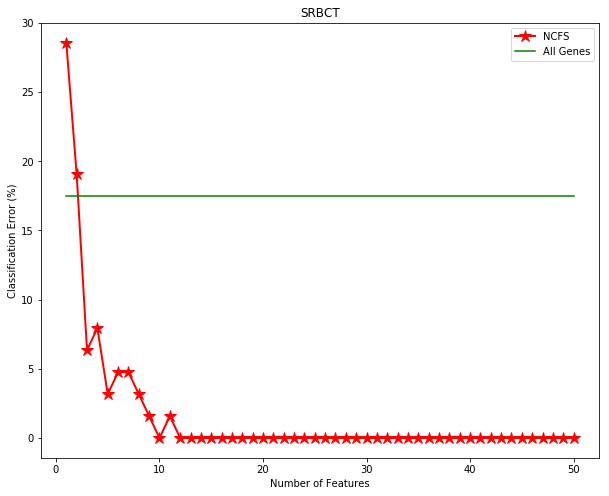

In [142]:
# Plot of DER for top 50 ranked features and without feature selection

x = np.array(range(1,51))
#plt.ylim(0,60)
plt.figure(figsize=(10,8))
plt.title('SRBCT')
plt.xlabel('Number of Features')
plt.ylabel('Classification Error (%)')
plt.plot(x, DER, color='red', marker='*',linewidth=2, markersize=12)
plt.plot(x,np.full((50,),DER_allgenes), color='green')
plt.gca().legend(('NCFS','All Genes'))